In [1]:
'''
In the United States, basketball is a very popular sport. Thus a lot of people follow the NBA, or National Basketball Association,
where the best basketball players in the world play in a league against each other to determine which team is the best. In order
to give the common person an opportunity to build their own best baskteball team, Fantasy Basketball was created for people to
predict which players will perform well in a season. In this tutorial, we will analyze player data from the 2022 season '''

'\nIn the United States, basketball is a very popular sport. Thus a lot of people follow the NBA, or National Basketball Association,\nwhere the best basketball players in the world play in a league against each other to determine which team is the best. In order\nto give the common person an opportunity to build their own best baskteball team, Fantasy Basketball was created for people to\npredict which players will perform well in a season. In this tutorial, we will analyze player data from the 2022 season '

In [2]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import re
import time

In [3]:
'''
This project is a project that is intended to predict fantasy basketball points based on certain indicators that we hope to
discover throughout the data analysis portion of the project.

Because many fantasy basketball datasets have a paywall, in our data, we will take data from all players
in the NBA based on stats, calculate the fantasy points every night for these 200 players, and then we will go from there.

We will use 2021-2022 as the training data and use 2022-2023 as the test set to make predictions for the future. 
'''

# First, we will use the dataset of seasonal averages to get all the general player data

# Data is from basketball reference (https://www.basketball-reference.com/leagues/NBA_2022_per_game.html)

player_data = pd.read_csv("player_data.csv")

player_data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,youngth01
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01


In [4]:
'''
Now we want to scrape the data

In order to scrape data easily, we will loop through the links of each player, we want player data from each game they played
'''

# Import packages
from bs4 import BeautifulSoup
import requests

# Initialize link and dataframe
link = "https://www.basketball-reference.com/players/"
columns = ["Name", "G", "Date", "Age", "Tm", "A/H", "Opp", "Res", "GS", "MP", "FG", 
           "FGA", "FG%", "3P", "3PA", "3P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", 
           "GmSc", "+/-"]
df = pd.DataFrame(columns = columns)

In [5]:
# Loop through every player's data page
visited = set()
length = len(player_data["Player"].unique())

In [ ]:
for i, line in player_data.iterrows():

    #print(line["Player"])
    if line["Player"] not in visited:
        player_id = line["Player-additional"]
        # Get the link for the player's individual stats for 2021-2022 season
        player_link = link + player_id[0] + "/" + player_id + "/gamelog/2022"

        # Use BeautifulSoup to get important contents
        result = requests.get(player_link)
        rc = result.content
        soup = BeautifulSoup(rc, "lxml")

        row = soup.find_all("tr", {"id": re.compile("pgl_basic\.[0-9]+")})
        if len(row) > 0:
            visited.add(line["Player"])
            
            for day in row:
                data_html = day.find_all("td")
                data = ["".join(item.strings) for item in data_html]
                data.insert(0, line["Player"])

                df.loc[len(df)] = data

        time.sleep(5)

#print(len(df["Name"].unique()))
df.to_csv("individual_data.csv")
df

In [6]:
# Now, we don't need to scrape the data. We can read it in.

df = pd.read_csv("individual_data.csv")

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,NaN,WAS,L (-15),1,...,4,7,2,1,0,1,4,6,3.9,-6.0
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,@,BOS,W (+32),1,...,12,15,0,1,0,0,0,15,15.0,16.0
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,NaN,DAL,L (-8),1,...,9,12,3,0,0,1,3,10,9.6,3.0
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,NaN,CHI,L (-3),1,...,9,11,2,0,0,2,2,11,6.1,-7.0
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,NaN,IND,W (+18),1,...,4,6,0,1,1,0,2,10,8.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,@,MIL,W (+34),1,...,1,3,4,0,1,0,1,11,11.7,22.0
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,NaN,NOP,W (+19),1,...,7,14,1,0,1,1,3,16,18.3,3.0
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,NaN,PHO,W (+4),1,...,10,11,1,0,2,2,4,13,12.6,14.0
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,NaN,SAC,W (+19),1,...,8,12,2,0,0,0,4,15,14.7,9.0


In [7]:
'''
In our dataset, Here's what all the columns represent:

Name - Name of player
G - game #
Date - date of game
Age - Age in years and days, separated by a hyphen
Tm - Team the player represents
A/H - Away or home game
Opp - Opposing team
Res - Result and margin of game
GS - Whether player started or nah
MP - Minutes played
FG - Field Goals
FGA - Field Goals Attempted
FG% - Field Goal Percent
3P - 3 Pointers Made
3PA - 3 Point Attempts
3P% - 3 Point Percent
FT - Free Throws Made
FTA - Free Throws Attempted
FT% - Free Throw Percent
ORB - Offensive Rebounds
DRB - Defensive Rebounds
TRB - Total Rebounds
AST - Assists
STL - Steals
BLK - Blocks
TOV - Turnovers
PF - Personal Fouls
PTS - Points
GmSc - Game Score
+/- - Plus/Minus 

'''

# First, Let's clean the data

df[["G", "GS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]] =( 
    df[["G", "GS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]].astype(int))

#df1[["FG%", "3P%", "FT%", "GmSc"]] = df1[["FG%", "3P%", "FT%", "GmSc"]].astype(float)
df["Date"] = pd.to_datetime(df["Date"])

def replace(char):
    if char == "@":
        return "A"
    else:
        return "H"
    
df["A/H"] = df["A/H"].apply(lambda x: replace(x))

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,H,WAS,L (-15),1,...,4,7,2,1,0,1,4,6,3.9,-6.0
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,A,BOS,W (+32),1,...,12,15,0,1,0,0,0,15,15.0,16.0
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,H,DAL,L (-8),1,...,9,12,3,0,0,1,3,10,9.6,3.0
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,H,CHI,L (-3),1,...,9,11,2,0,0,2,2,11,6.1,-7.0
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,H,IND,W (+18),1,...,4,6,0,1,1,0,2,10,8.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,A,MIL,W (+34),1,...,1,3,4,0,1,0,1,11,11.7,22.0
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,H,NOP,W (+19),1,...,7,14,1,0,1,1,3,16,18.3,3.0
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,H,PHO,W (+4),1,...,10,11,1,0,2,2,4,13,12.6,14.0
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,H,SAC,W (+19),1,...,8,12,2,0,0,0,4,15,14.7,9.0


In [8]:
# Now, let's create a new column describing fantasy points
# Formula: 
# Fantasy Points = Points - 2 * Turnovers + Blocks * 4 + Steals * 4 + Assists * 2 + Rebounds + Three Pointers Made - 
# Free Throws Attempted + Free Throws Made - Field Goals Attempted + Field Goals Made * 2
df["Fantasy_Points"] = 0
df["Fantasy_Points"] = (df["PTS"] - df["TOV"] * 2 + df["BLK"] * 4 + df["STL"] * 4 + df["AST"] * 2 + df["TRB"] + df["3P"]
                        - df["FTA"] + df["FT"] - df["FGA"] + 2 * df["FG"])

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,H,WAS,L (-15),1,...,7,2,1,0,1,4,6,3.9,-6.0,15
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,A,BOS,W (+32),1,...,15,0,1,0,0,0,15,15.0,16.0,34
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,H,DAL,L (-8),1,...,12,3,0,0,1,3,10,9.6,3.0,24
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,H,CHI,L (-3),1,...,11,2,0,0,2,2,11,6.1,-7.0,17
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,H,IND,W (+18),1,...,6,0,1,1,0,2,10,8.0,18.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,A,MIL,W (+34),1,...,3,4,0,1,0,1,11,11.7,22.0,26
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,H,NOP,W (+19),1,...,14,1,0,1,1,3,16,18.3,3.0,38
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,H,PHO,W (+4),1,...,11,1,0,2,2,4,13,12.6,14.0,33
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,H,SAC,W (+19),1,...,12,2,0,0,0,4,15,14.7,9.0,33


In [9]:
df.describe()

,Unnamed: 0,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
count,26012.000000,26012.000000,26012.000000,26012.000000,26012.000000,24743.000000,26012.000000,26012.000000,20442.000000,26012.000000,...,26012.000000,26012.000000,26012.000000,26012.000000,26012.0000,26012.000000,26012.000000,26012.000000,26003.000000,26012.000000
mean,13005.500000,29.766569,0.472705,3.836998,8.321083,0.450453,1.174881,3.323197,0.325391,1.600300,...,4.200715,2.327118,0.720821,0.445256,1.2332,1.856489,10.449177,8.309303,-0.003461,21.563778
std,7509.161937,19.685024,0.499264,3.169957,5.928477,0.237962,1.483749,3.058890,0.289757,2.249339,...,3.458309,2.580953,0.951813,0.787846,1.3959,1.472536,8.552515,7.556758,11.551418,16.431072
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-8.300000,-56.000000,-12.000000
25%,6502.750000,13.000000,0.000000,1.000000,4.000000,0.333000,0.000000,1.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.0000,1.000000,4.000000,2.400000,-7.000000,9.000000
50%,13005.500000,27.000000,0.000000,3.000000,7.000000,0.455000,1.000000,3.000000,0.333000,1.000000,...,3.000000,2.000000,0.000000,0.000000,1.0000,2.000000,9.000000,6.900000,0.000000,19.000000
75%,19508.250000,45.000000,1.000000,6.000000,12.000000,0.583000,2.000000,5.000000,0.500000,2.000000,...,6.000000,3.000000,1.000000,1.000000,2.0000,3.000000,15.000000,12.800000,7.000000,32.000000
max,26011.000000,82.000000,1.000000,22.000000,37.000000,1.000000,11.000000,20.000000,1.000000,23.000000,...,25.000000,19.000000,8.000000,8.000000,10.0000,6.000000,60.000000,53.800000,52.000000,110.000000


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

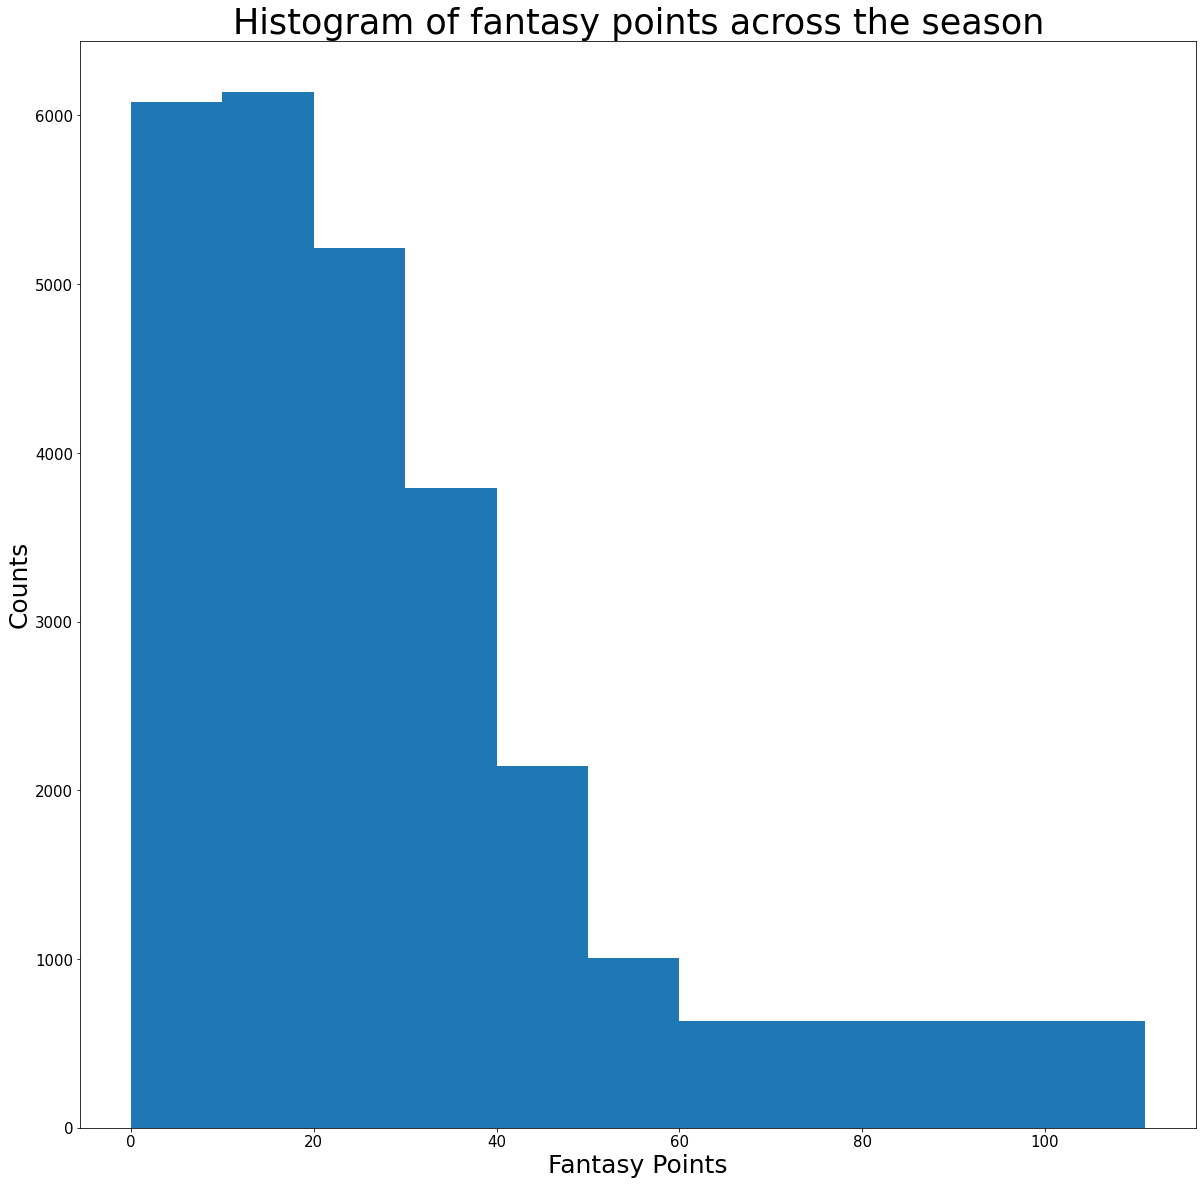

In [10]:
# Let's first visualize the data

fig, ax = plt.subplots(figsize = (20, 20))

plt.title("Histogram of fantasy points across the season", fontsize = 35)
plt.xlabel("Fantasy Points", fontsize = 25)
plt.ylabel("Counts", fontsize = 25)

plt.hist(df["Fantasy_Points"], bins = [0, 10, 20, 30, 40, 50, 60, 111])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

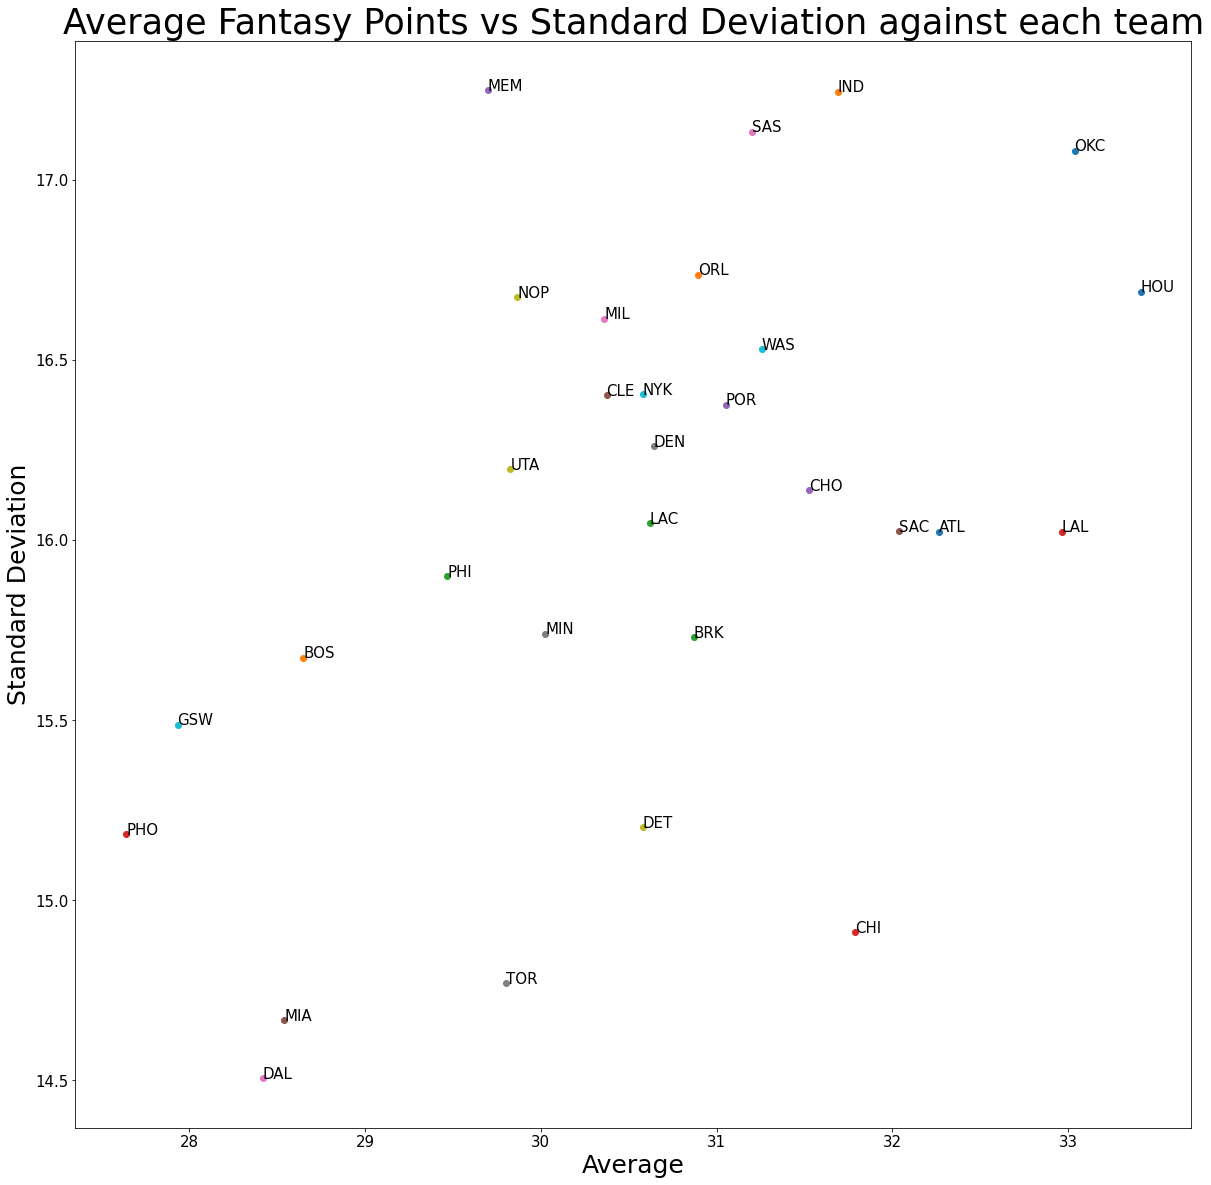

In [11]:
'''
It appears that many players score within the 10-20 range in fantasy basketball.

Now, it is time to compare variables with each other.
'''

fig, ax = plt.subplots(figsize = (20, 20))

starter_dataset = df.loc[df["GS"] == 1]

plt.title("Average Fantasy Points vs Standard Deviation against each team", fontsize = 35)
plt.xlabel("Average", fontsize = 25)
plt.ylabel("Standard Deviation", fontsize = 25)

average_points = starter_dataset.groupby("Opp")["Fantasy_Points"].mean().to_frame()
std_points = starter_dataset.groupby("Opp")["Fantasy_Points"].std().to_frame()
average_points = average_points.rename(columns = {"Fantasy_Points": "Mean"})
std_points = std_points.rename(columns = {"Fantasy_Points": "Std"})

avg_dataset = pd.concat([average_points, std_points], axis = 1)

for i, row in avg_dataset.iterrows():
    
    ax.annotate(i, (row["Mean"], row["Std"]), fontsize = 15)
    ax.plot(row["Mean"], row["Std"], marker = 'o')
    
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

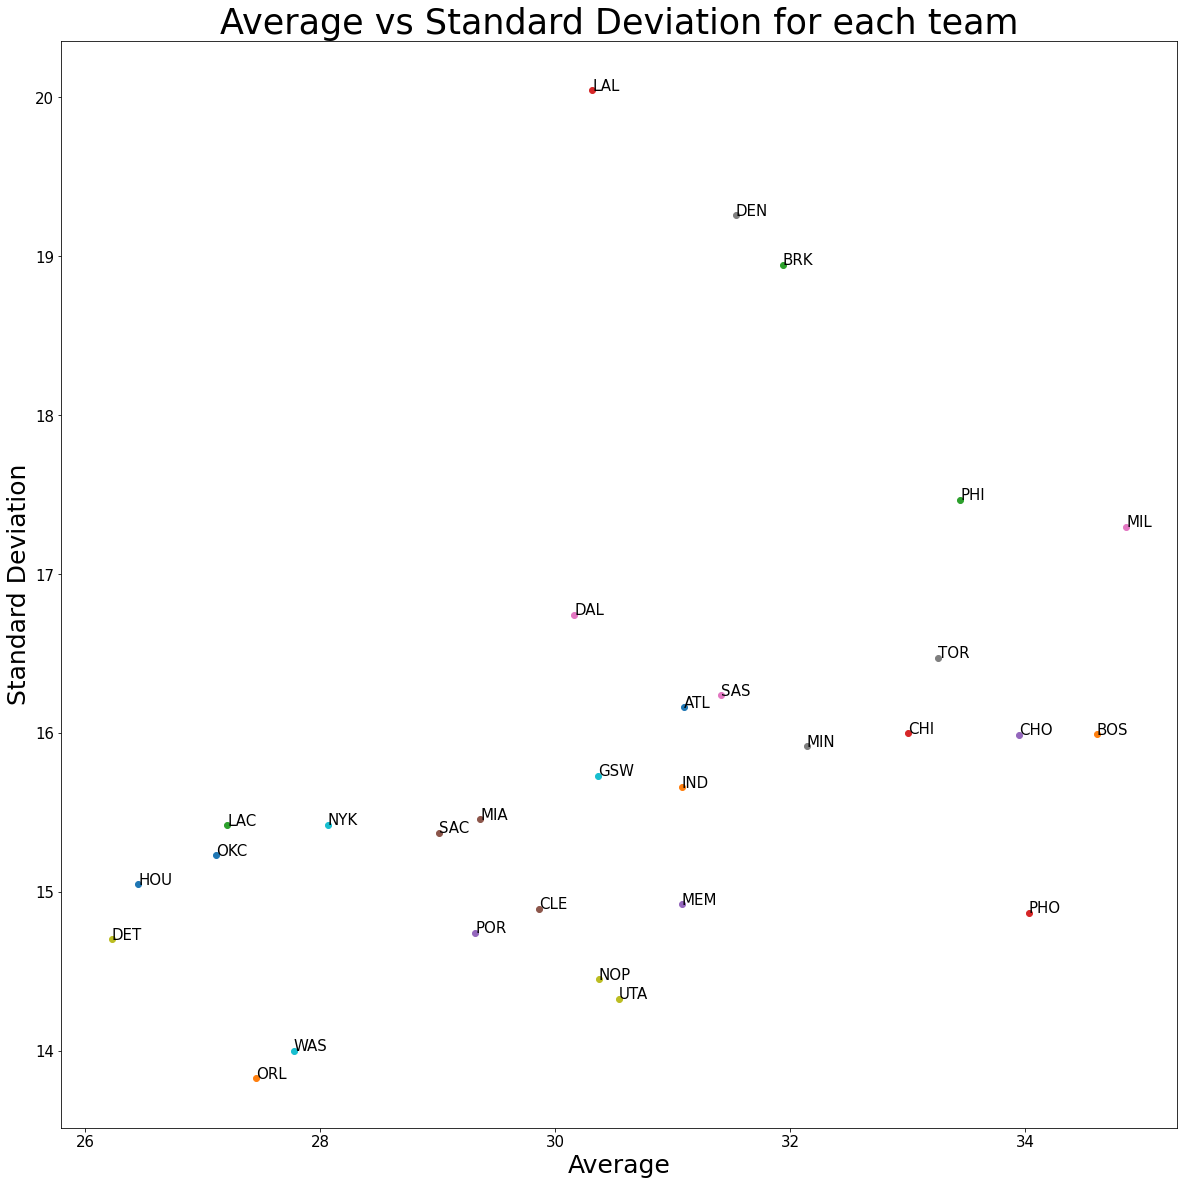

In [12]:
'''
With a direct comparison, it appears that on average, teams with better records often had less fantasy points scored against
them and teams with worse records on average had more fantasy points scored on them. 

Now for extra insurance, let's graph each starting 5's average fantasy points throughout the whole year 
'''

fig, ax = plt.subplots(figsize = (20, 20))

starter_dataset = df.loc[df["GS"] == 1]

plt.title("Average vs Standard Deviation for each team", fontsize = 35)
plt.xlabel("Average", fontsize = 25)
plt.ylabel("Standard Deviation", fontsize = 25)

average_points = starter_dataset.groupby("Tm")["Fantasy_Points"].mean().to_frame()
std_points = starter_dataset.groupby("Tm")["Fantasy_Points"].std().to_frame()
average_points = average_points.rename(columns = {"Fantasy_Points": "Mean"})
std_points = std_points.rename(columns = {"Fantasy_Points": "Std"})

avg_dataset = pd.concat([average_points, std_points], axis = 1)

for i, row in avg_dataset.iterrows():
    
    ax.annotate(i, (row["Mean"], row["Std"]), fontsize = 15)
    ax.plot(row["Mean"], row["Std"], marker = 'o')
    
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [13]:
'''
From this graph, we can hypothesize that teams with better records often score more fantasy points, which isn't too hard to
believe. The standard deviation variable seems like there are outliers, but the scale appears a bit too small to be able to
make a clear indication that the standard deviation is significant. In order to observe this, we will first figure out which
hypothesis test we need to use.

We will first perform a hypothesis test on the Los Angeles Lakers for starters
'''

lakers_data = df.loc[df["Tm"] == "LAL"]
lakers_data = lakers_data.loc[lakers_data["GS"] == 1]

lakers_data

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
738,738,Carmelo Anthony,14,2021-11-14,37-169,LAL,H,SAS,W (+8),1,...,5,0,0,0,1,4,15,10.6,-6.0,22
739,739,Carmelo Anthony,15,2021-11-15,37-170,LAL,H,CHI,L (-18),1,...,4,1,2,0,0,2,9,6.7,-21.0,20
740,740,Carmelo Anthony,16,2021-11-17,37-172,LAL,A,MIL,L (-7),1,...,6,1,1,0,2,2,10,5.3,1.0,18
921,921,Trevor Ariza,5,2022-01-04,36-188,LAL,H,SAC,W (+8),1,...,3,0,0,1,0,0,0,0.9,-8.0,6
924,924,Trevor Ariza,8,2022-01-12,36-196,LAL,A,SAC,L (-9),1,...,5,3,3,0,1,2,2,5.2,-14.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24725,24725,Russell Westbrook,74,2022-03-29,33-137,LAL,A,DAL,L (-18),1,...,8,6,0,0,2,3,25,20.1,-25.0,43
24726,24726,Russell Westbrook,75,2022-03-31,33-139,LAL,A,UTA,L (-13),1,...,6,7,0,0,3,2,24,16.7,-17.0,34
24727,24727,Russell Westbrook,76,2022-04-01,33-140,LAL,H,NOP,L (-3),1,...,4,5,0,0,1,6,12,5.6,-12.0,21
24728,24728,Russell Westbrook,77,2022-04-03,33-142,LAL,H,DEN,L (-11),1,...,10,7,2,1,2,5,27,26.3,1.0,61


In [14]:
print(df.columns)

Index(['Unnamed: 0', 'Name', 'G', 'Date', 'Age', 'Tm', 'A/H', 'Opp', 'Res',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc',
       '+/-', 'Fantasy_Points'],
      dtype='object')


In [15]:
print(len(df['Name'].value_counts()))


604


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26012 entries, 0 to 26011
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      26012 non-null  int64         
 1   Name            26012 non-null  object        
 2   G               26012 non-null  int64         
 3   Date            26012 non-null  datetime64[ns]
 4   Age             26012 non-null  object        
 5   Tm              26012 non-null  object        
 6   A/H             26012 non-null  object        
 7   Opp             26012 non-null  object        
 8   Res             26012 non-null  object        
 9   GS              26012 non-null  int64         
 10  MP              26012 non-null  object        
 11  FG              26012 non-null  int64         
 12  FGA             26012 non-null  int64         
 13  FG%             24743 non-null  float64       
 14  3P              26012 non-null  int64         
 15  3P

In [17]:
#Since there is many teams, we wouldnt want to hot encode based on team
#Home and Away we can hot enocde
#Your opposition here in this context does not matter based on how an ML Model can interpret.

#The formula is the following below:
#Fantasy Points = Points - 2 * Turnovers + Blocks * 4 + Steals * 4 + Assists * 2 + Rebounds + Three Pointers Made - 
# Free Throws Attempted + Free Throws Made - Field Goals Attempted + Field Goals Made * 2


df1 = lakers_data[['Name', 'PTS', 'TOV', 'BLK', 'STL', 'AST', 'TRB', '3P', 'FTA', 'FT', 'FGA', 'FG']]
df2 = lakers_data['Fantasy_Points']
df2.head()


738    22
739    20
740    18
921     6
924    21
Name: Fantasy_Points, dtype: int64

In [29]:
import sklearn
from sklearn import linear_model
from sklearn. model_selection import train_test_split
new_df_year = df1.drop('Name', axis=1)
#print(new_df_year)
X_train = new_df_year
y_train = df2
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
LinearM = mean_absolute_error(y_test, predictions)


In [30]:
#Code tailored for decison tree regressor


X = df1.drop('Name', axis=1)
print(type(X))
y = df2
print(type(y))
X_train, X_test, y_train, y_test = train_test_split(X, y)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
#Code tailored for decision tree regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
param_grid = {
'max_depth': [3, 5, 10, 25, 50, 100, None],
'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    cv=5,
)

grid.fit(X_train, y_train)
paramsUpdated = grid.best_params_

dtc = DecisionTreeRegressor(criterion = paramsUpdated['criterion'], max_depth = paramsUpdated['max_depth'])
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
DTR = mean_absolute_error(y_test, predictions)

In [32]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
'max_depth': [3, 5, 10, 25, 50, 100, None],
'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV (RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
optimal_depth = grid.best_params_['max_depth']
optimal_criterion = grid.best_params_['criterion']
print("Best max depth:", optimal_depth)
print("Best criterion:", optimal_criterion)

Best max depth: 100
Best criterion: absolute_error


In [33]:
rfc = RandomForestRegressor(max_depth = optimal_depth, criterion = optimal_criterion)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
RFR = mean_absolute_error(y_test, predictions)

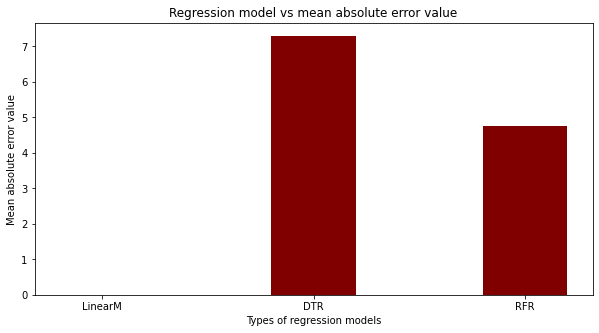

In [34]:
# creating the dataset for the bar chart
data = {'LinearM':LinearM, 'DTR':DTR, 'RFR':RFR}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Types of regression models")
plt.ylabel("Mean absolute error value")
plt.title("Regression model vs mean absolute error value")
plt.show()